In [1]:
import numpy as np
import matplotlib.pyplot as plt
import requests, json

In [2]:
def calc_arbitrage(coin="btc", market_val="usd"):

    try:
        mkt_data = requests.get("https://api.cryptonator.com/api/full/{}-{}".format(coin.lower(), market_val.lower())).json()["ticker"]["markets"]
    except:
        print("Error. Try again!!")
        coin = input("Enter coin: ")
        currency = input("Enter currency: ")
        calc_arbitrage(coin, currency)
    mkt_data_arr = np.array([])
    for i in range(0, len(mkt_data)):
        mkt_data_arr = np.append(mkt_data_arr, np.array([mkt_data[i]["market"], mkt_data[i]["price"], mkt_data[i]["volume"]]))

    mkt_data_arr = mkt_data_arr.reshape(len(mkt_data), 3)
    market = mkt_data_arr[:, 0]
    prices = np.array([mkt_data_arr[:, 1]], dtype="float64")
    volumes = np.array([mkt_data_arr[:, 2]], dtype="float64")

    plt.scatter(prices, volumes)
    for mkt, price, vol in zip(market, prices.flatten(), volumes.flatten()):
        plt.annotate(mkt,
                     xy=(price, vol),
                     xytext=(5, -5),
                     textcoords='offset points', fontsize=10
                     )


    plt.title("{} - {}" .format(coin.upper(), market_val.upper()))
    plt.xlabel("Price")
    plt.ylabel("Volume")

    maxPrice = np.max(prices)
    maxPrice_market = market[np.argmax(prices)]
    minPrice = np.min(prices)
    minPrice_market = market[np.argmin(prices)]

    diff = maxPrice - minPrice

    print("The coin '{}' has highest price of '{}' for '{}' currency". format(coin.upper(), maxPrice, maxPrice_market.upper()))
    print("The coin '{}' has lowest price of '{}' for '{}' currency". format(coin.upper(), minPrice, minPrice_market.upper()))
    print("The difference is: {}" .format(diff))

    plt.show()


Enter coin: btc
Enter currency: usd
The coin 'BTC' has highest price of '9489.0' for 'C-CEX' currency
The coin 'BTC' has lowest price of '8774.4' for 'KRAKEN' currency
The difference is: 714.6000000000004


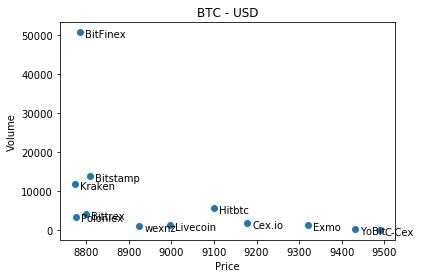

In [3]:
coin = input("Enter coin: ")
currency = input("Enter currency: ")
calc_arbitrage(coin, currency)